In [2]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import  matplotlib.patches as patches
from PIL import Image, ImageDraw

## Compute the average kernel

In [6]:
# set the path to the downloaded data: 
data_path = 'data/kernel_resized'

# get sorted list of files: 
imlist = sorted(os.listdir(data_path)) 

# remove any non-JPEG files: 
imlist = [f for f in imlist if '.jpg' in f] 

w,h=Image.open(os.path.join(data_path,imlist[0])).size
N=len(imlist)

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((h,w,3),np.float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(Image.open(os.path.join(data_path, im)),dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save(os.path.join(data_path, 'kernel_ave.jpg'))
out.show()

ValueError: operands could not be broadcast together with shapes (23,11,3) (69,38,3) 

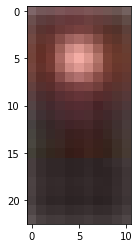

In [8]:
# visualize the average red traffic light
kernel = Image.open('data/kernel_resized/kernel_ave.jpg')
plt.imshow(np.asarray(kernel))

In [21]:
# load data from JSON file
preds_path = 'data/hw01_preds'
with open(os.path.join(preds_path,'preds.json'), 'r') as read_file:
    boxes = json.load(read_file)
   
data_path = 'data/RedLights2011_Medium'
# get sorted list of files:
file_names = sorted(os.listdir(data_path))
# remove any non-JPEG files:
file_names = [f for f in file_names if '.jpg' in f]

## Save the visualization results

In [ ]:
for file_name in file_names:
    I = Image.open(os.path.join(data_path,file_name))
    
    draw = ImageDraw.Draw(I)
    
    for box in boxes[file_name]:
        draw.rectangle([box[1],box[0],box[3],box[2]],outline='red')      
    
    save_folder = 'data/visulizaton/'
    if not os.path.isdir(save_folder):
        os.makedirs(save_folder)
    I.save(save_folder + file_name[:-4] + '.png')